Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024 |
<u>**ACTIVITY NO. 6** | **Face Detection using OpenCV**
**Name** | Dela Cruz, Gabrielle
**Section** | CPE32S3
**Date Performed**: | February 20, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

In [ ]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2

picPath = 'breaking_bad.jpg'
haarPath = 'haarcascade_frontalface_default.xml'

def faceDetect(picPath):
    face_cascade = cv2.CascadeClassifier(haarPath)

    img = cv2.imread(picPath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)

    return img  # Return the modified image

In [ ]:
detectedImage = faceDetect(picPath)
cv2.imshow('Detected Faces', detectedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

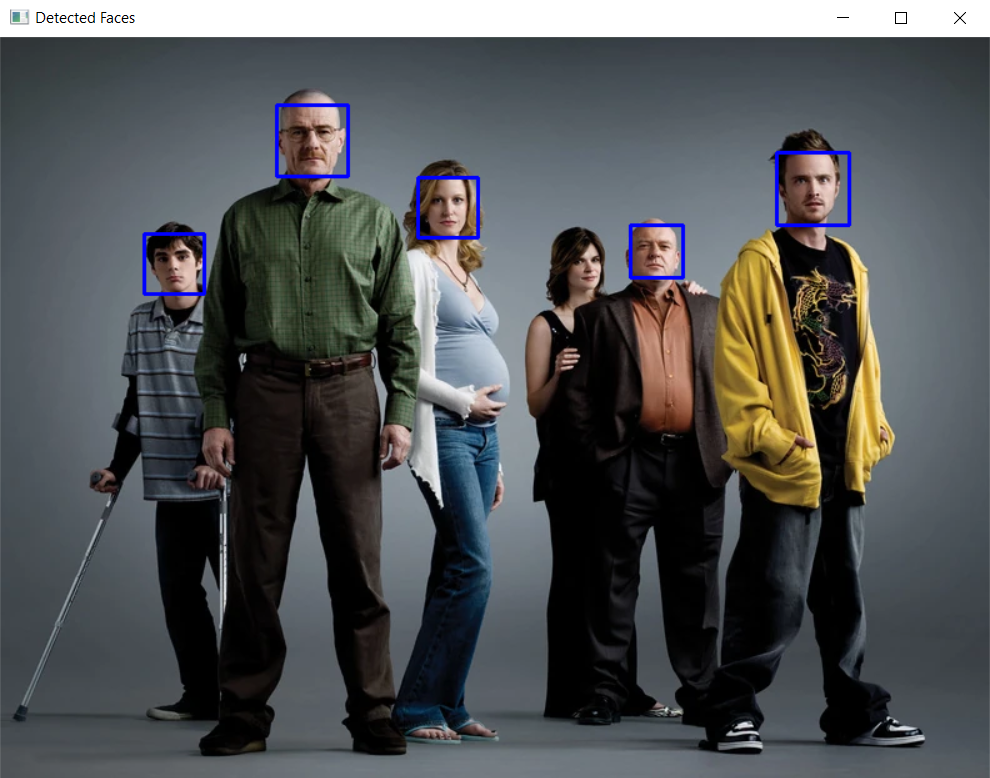

**Analysis**:

Based on your earlier analysis, where do you think the face detection works in the line of code above?
- The feature of face detection lies in the function of faceDetect() where it reads the image, turns it into grayscale, treats with the detectMultiScale method, and undergoes a For loop by the detected faces inside the image.

Provide an analysis of the parameters of the `detectMultiScale` method.
- It is the function that enables the detection of faces in the iamge with the containing several parameters to modify the detection. In the code block above, the parameters mean that grayscale image is to be applied, the scaleFactor is equal to 1.3 that specifies the reduction of image size per image scale, with the minNeighbors equal to 5 (higher means lower detection, but of high quality) that relates to the number of neighboring triangles for retention.

Change the color of the border of the detected faces to red. Are you able to make the borders thicker? Demonstrate.

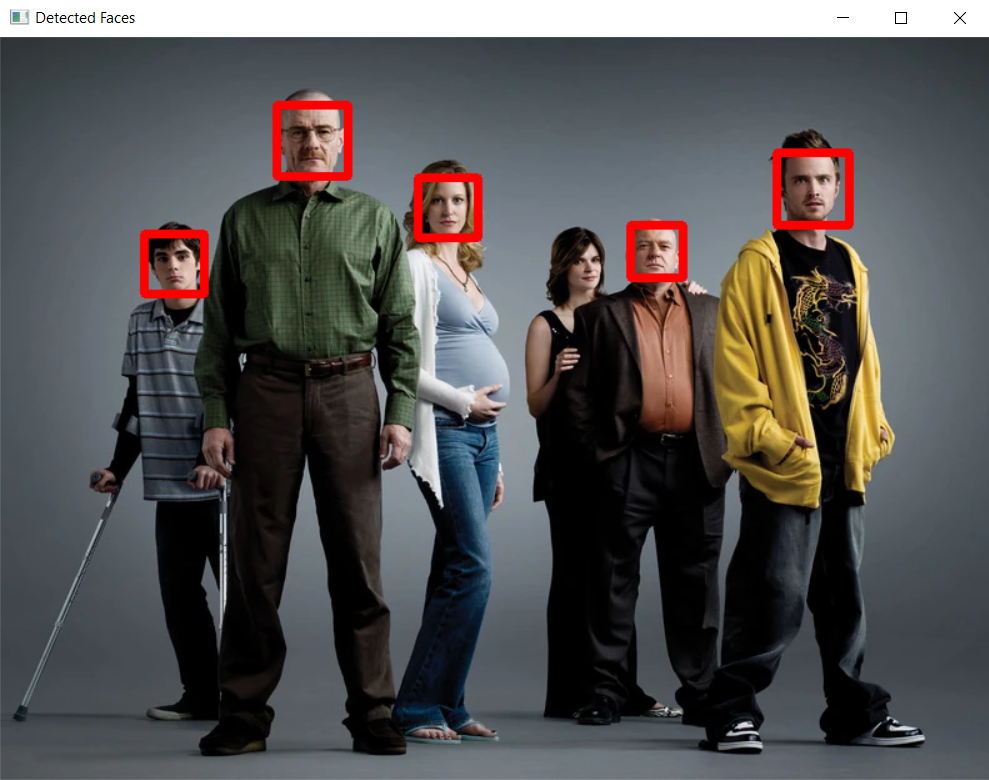


### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [ ]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [ ]:
def detect():
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [ ]:
while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [ ]:
  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [ ]:
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [ ]:
    cv2.imshow("camera", frame)
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
detect()

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

In [ ]:
def detect():
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    camera = cv2.VideoCapture(0)

    while (True):
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, 0, (40,40))

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh), (0,255,0),2)

        cv2.imshow("camera", frame)
        if cv2.waitKey(1000 // 12) & 0xff == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()

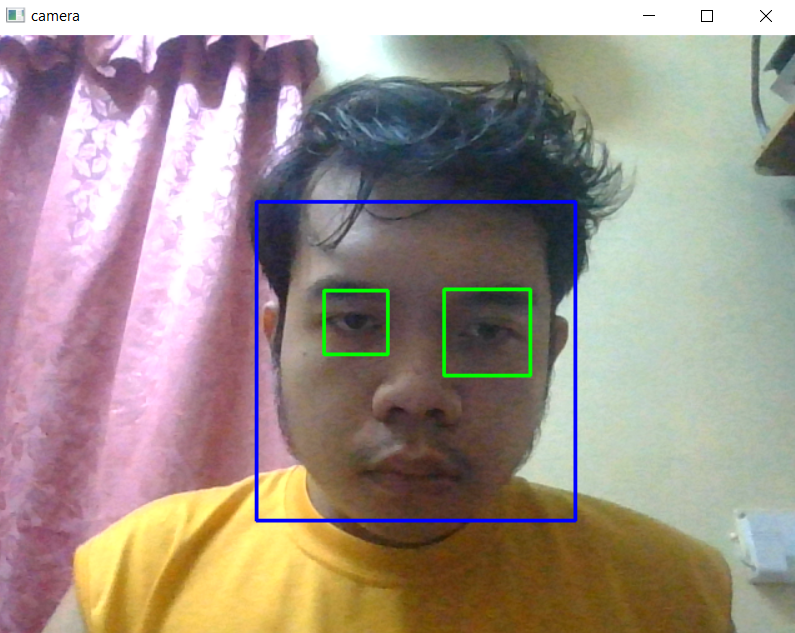

*The code block above tests its face detection capabilities when live recording using the webcam. In order to have constructed the entirety of the code per every code block that needs to be pieced altogether, one has to build it in order. First, importing cv2 is optional at this point since it has been imported from the start of the notebook. Afterwards, we will implement the cascade classifiers for both the XML files and the camera is enabled with VideoCapture(0). The camera is read real-time and converted into grayscale, and the similar processes from before happens.*

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Marking a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 4)  # Red color with thickness of 4

            # Determining ROI for the face
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            # Detecting smiles within ROI
            smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20, minSize=(25, 25))

            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (255, 0, 0), 2)  # Marking the smile with a blue rectangle, thickness of 2

        # Display the frame with detected faces and smiles
        cv2.imshow('Smiling Face Detection', frame)

        # Execution of the loop until breaking by pressing Q.
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Opening the webcam window and opting out of the window
cap.release()
cv2.destroyAllWindows()

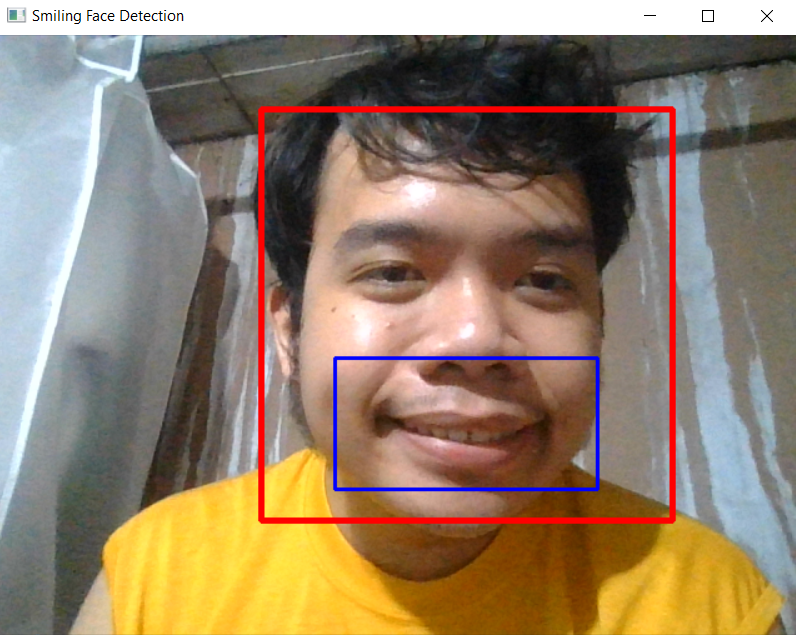

## 5. Summary, Conclusions and Lessons Learned

Much like the previous detection activities, this notebook explores the capabilities of Haar cascade with real-time face detection. In recognition of faces in real-time, the tandem between the cascades and the function detectMultiScale and its several parameters defines the detection performance by their roles. Similar to previous techniques, these cascades and functions have different variants for multiple purposes, in terms of detection performance, customization, and ease of modifications.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*